In [1]:
from vapory import *
from IPython.display import Image
import numpy as np
from IPython.display import *
%pylab inline
import matplotlib.pyplot as plt
import time

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
X0 = 0
F0 = [np.pi/40, 0]
XF = 10
g = 10.
l = 5.

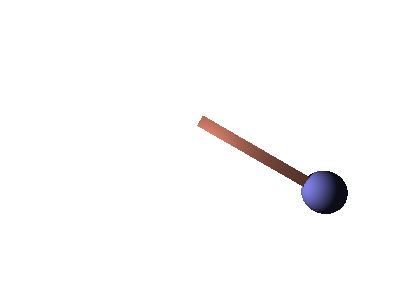

In [3]:
color = lambda col: Texture( Pigment( 'color', col))

def scene(t):
    """ Returns the scene at time 't' (in seconds) """
    x = np.sin(np.deg2rad(t))*l
    y = 1-np.cos(np.deg2rad(t))*l
    
    pendulum = Union(Box([-.2, l, 0] , [.2,0,0],
                        color([1,.6,.5])),
                    Sphere( [0,0,0] , .75,  color([.5, .5, .9])),
                    'rotate', [0, 0, t],
                    'translate', [x, y, 0] )
    return Scene( Camera( 'location', [0, 2, -10], 'look_at',  [0, 0, 0] ),
            [ LightSource( [0, 0, -1], 'color', [1.5,1.5,1.5] ),
              Background( "color", [1,1,1] ),
              pendulum])
scene(60).render('ipython', width=400, height=300)

In [4]:
from moviepy.editor import VideoClip

In [5]:
figsize(12, 12)

In [6]:
def f(t, Ys):
    v, y = Ys
    return np.array([y, -v*np.sqrt(g/l)])

In [7]:
def F(y, F0 = F0):
    return -F0[0]*np.sin(y*np.power(g/l, 1/4))

In [8]:
def simple_euler(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros(Xs.shape + (2,))
    Ys[0] = G0
    for i in range(N-1):
        Ys[i+1] = Ys[i] + h*g(Xs[i], Ys[i])
    return Ys.T

In [9]:
def plot_results_for(M, with_n = [1e2]):
    _, plots = plt.subplots(len(with_n)+1, sharex=True)
    for plot, n in zip(plots[1:], with_n):
        Xs = np.linspace(X0, XF, n)
        h = round(np.log10(abs(Xs[1] - Xs[0])), 2)
        TS = F(Xs)
        S = M(Xs = Xs)[1]
        label = 'solution ' + str(h)
        plots[0].plot(Xs, S, label=label)
        plot.set_title(label)
        errs = np.log10(np.absolute(np.power(S - TS, 2)/TS))
        plot.plot(Xs[1:], (errs[1:]))
    plots[0].plot(Xs, TS, label='original')
    plots[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.7)

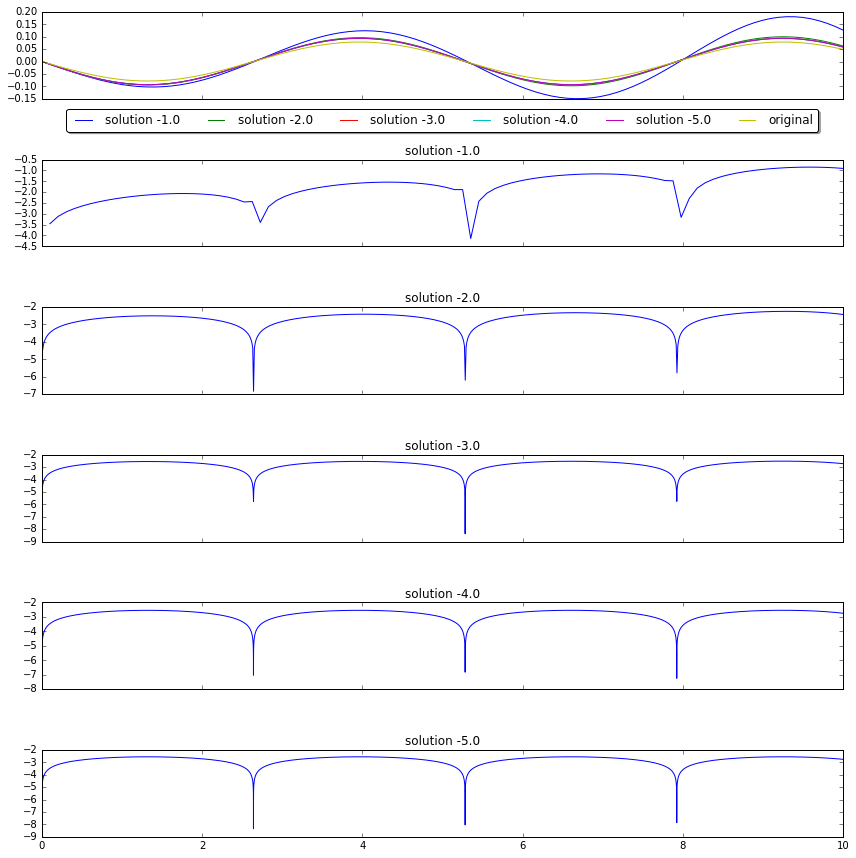

In [10]:
plot_results_for(simple_euler, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [11]:
def merson(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros(Xs.shape + (2,))
    Ys[0] = G0
    for i in range(N-1):
        k1 = h*g(Xs[i], Ys[i])
        k2 = h*g(Xs[i] + h/3., Ys[i] + k1/3.)
        k3 = h*g(Xs[i] + h/3., Ys[i] + (k1 + k2)/6.)
        k4 = h*g(Xs[i] + h/2., Ys[i] + (k1 + k3*3.)/8.)
        k5 = h*g(Xs[i+1], Ys[i] + (k1 - k3*3. + k4*4)/2.)
        Ys[i+1] = Ys[i] + k1/6. + k4*2./3. + k5/6.
    return Ys.T

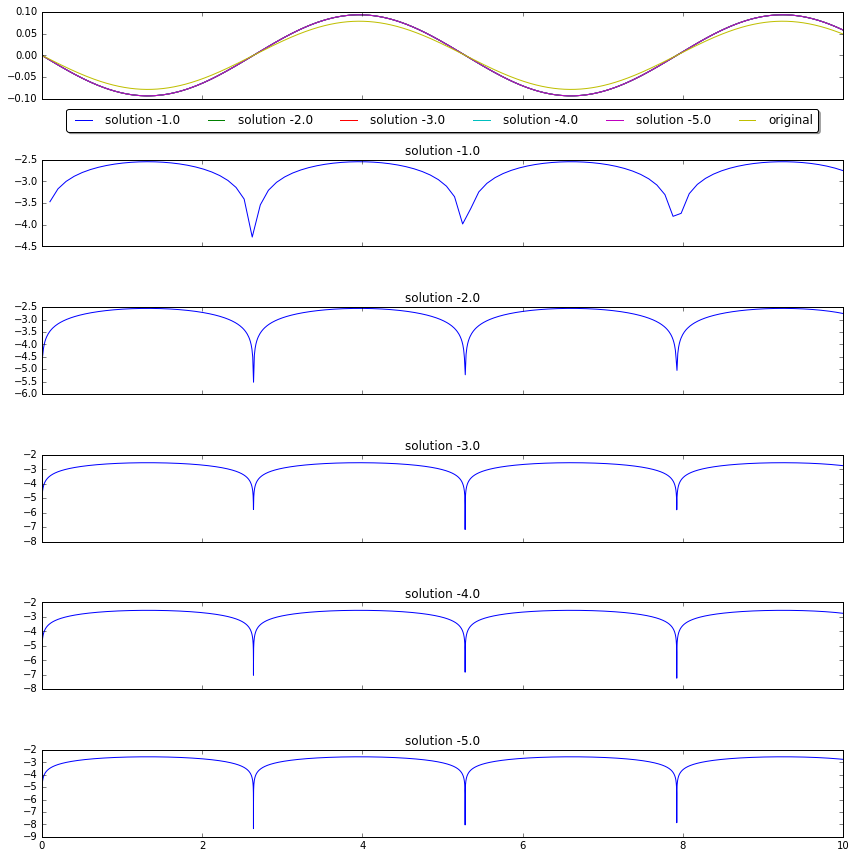

In [12]:
plot_results_for(merson, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [13]:
def middle_point(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros(Xs.shape + (2,))
    Ys[0] = G0
    for i in range(N-1):
        k1 = h*g(Xs[i], Ys[1])
        k2 = h*g((Xs[i] + Xs[i+1])/2., Ys[i] + k1/2.)
        Ys[i+1] = Ys[i] + k2
    return Ys.T

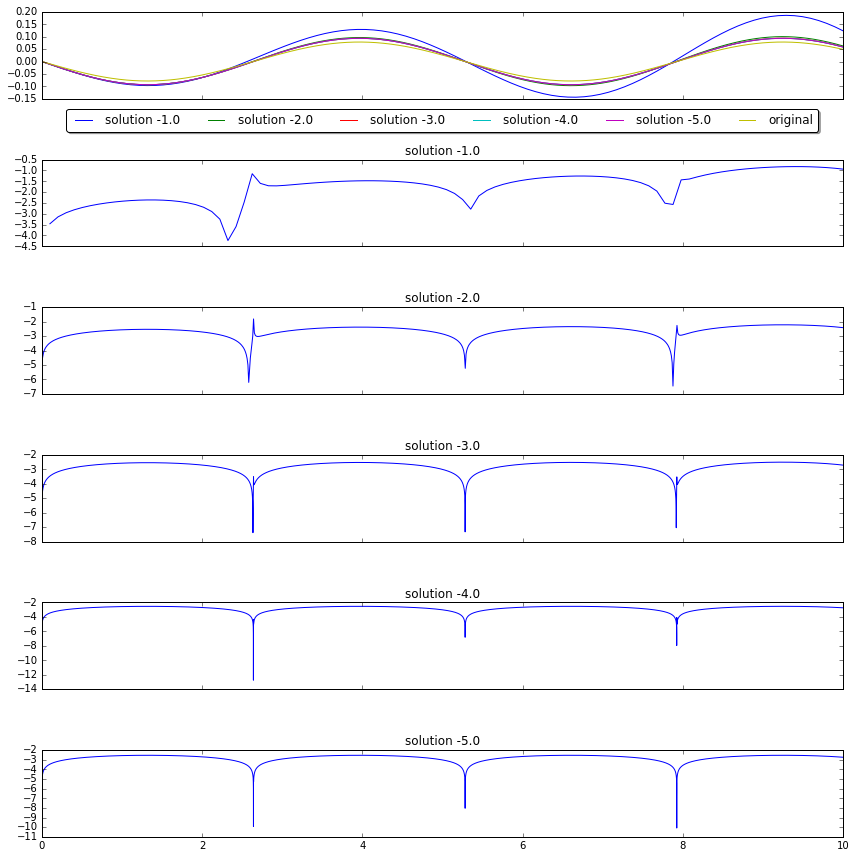

In [14]:
plot_results_for(middle_point, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [15]:
def z(t, Ys):
    v, y = Ys
    return np.array([y, -np.sin(v)*np.sqrt(g/l)])

In [16]:
def plot_nlresults_for(M, with_n = [1e2]):
    for n in with_n:
        Xs = np.linspace(X0, XF, n)
        h = round(np.log10(abs(Xs[1] - Xs[0])), 2)
        TS = F(Xs)
        S = M(Xs = Xs, g = z)[1]
        label = 'solution ' + str(h)
        plt.plot(Xs, S, label=label)
    plt.plot(Xs, TS, label='original')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.7)

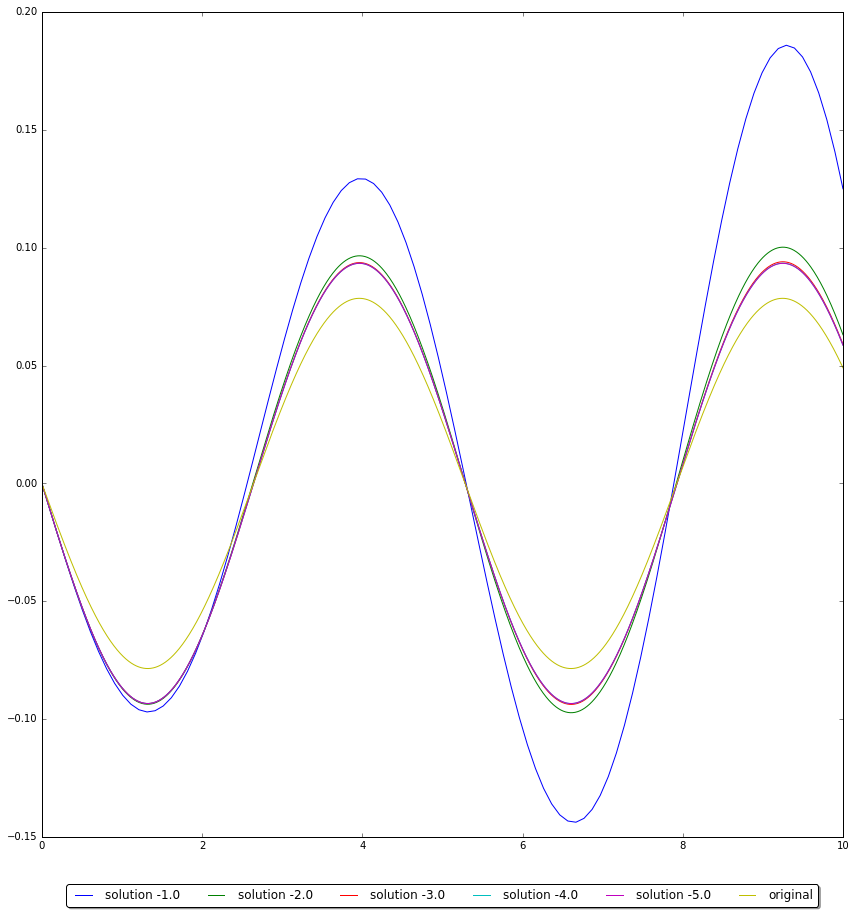

In [17]:
plot_nlresults_for(middle_point, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

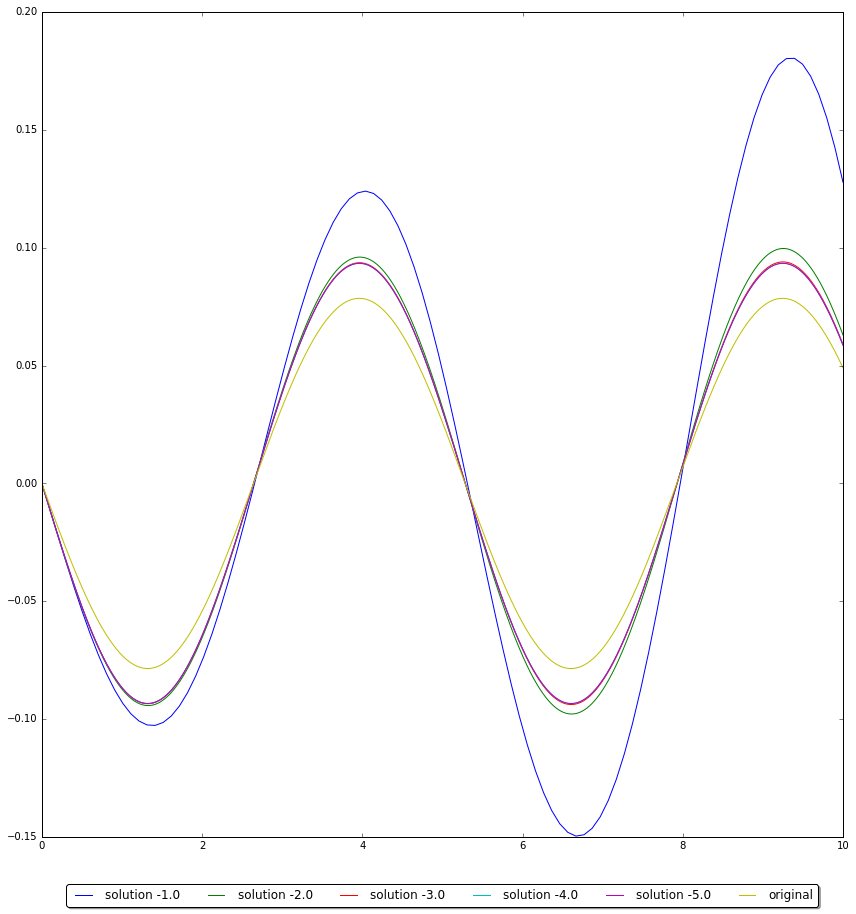

In [18]:
plot_nlresults_for(simple_euler, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

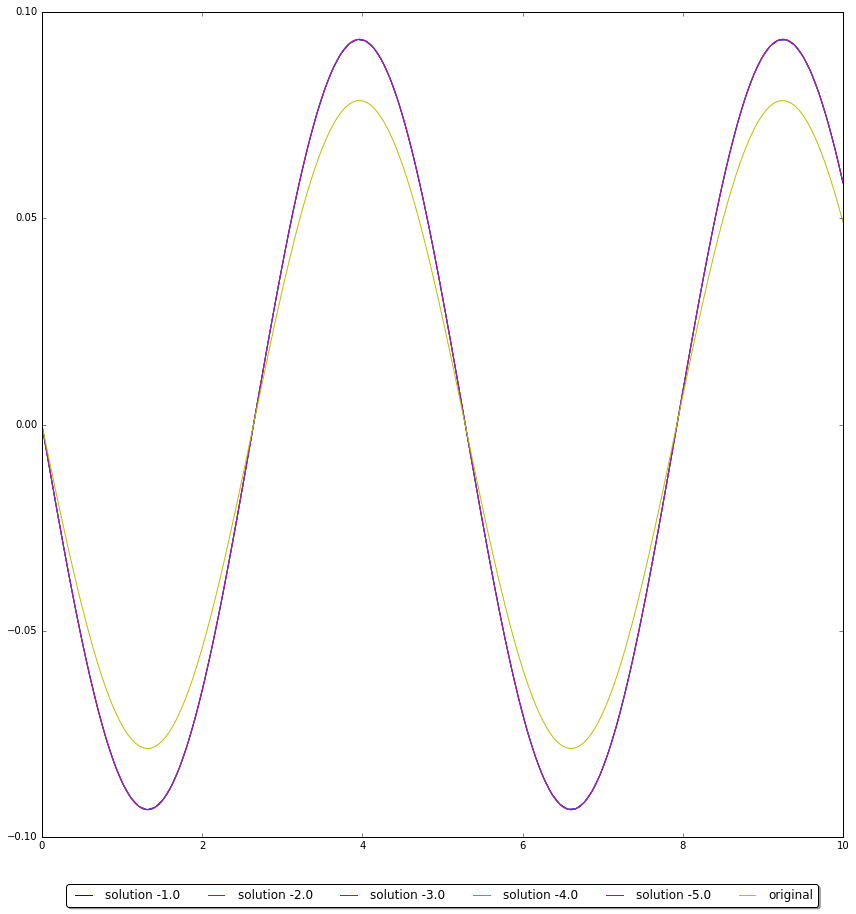

In [19]:
plot_nlresults_for(merson, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [20]:
Xs = np.linspace(X0, 10, 300)
S = merson(Xs = Xs, g = z, G0 = F0)[1]

In [21]:
def make_frame(S=S, alpha=1000, d=10):
    return lambda t: scene(alpha*S[int(t/d*S.size)]).render(width = 400, height = 300, antialiasing=0.1)

In [22]:
name = "anim_%d.gif" % time.time() 
VideoClip(make_frame(alpha=100, d=10), duration=10).write_gif(name, fps=30)
Image(url = name)


[MoviePy] Building file anim_1459957724.gif with imageio


In [23]:
m = 2
c = 2
def w(t, Ys):
    v, y = Ys
    p = -1*m/(l*l)
    return np.array([y, p * (np.sin(v)*m*g*l + c*l*y)])

In [24]:
S1 = merson(Xs = Xs, g = w, G0 = F0)[1]

In [25]:
name = "anim_%d.gif" % time.time() 
VideoClip(make_frame(alpha=100, d=10, S=S1), duration=10).write_gif(name, fps=30)
Image(url = name)


[MoviePy] Building file anim_1459957944.gif with imageio
